# TASK 1 : Curve fitting 

I have used scipy module to perform curve fitting for task 1 where we need to define function beforehand.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from tifffile import imread
import cv2

In [2]:
# given code for Photobleaching
t = np.arange(0, 10, 0.2)
a = 4.5 * np.exp(-0.4*t) + np.random.normal(0, 0.5, size=t.shape)

In [3]:
# for exponential decay fitting
def exp_func(x, p, q, r):
    return p * np.exp(-q * x) + r    

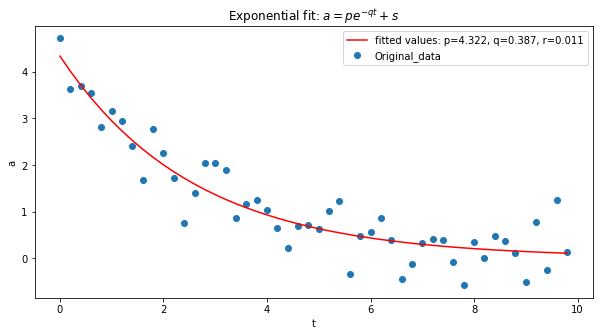

In [4]:
# function to fit data on exp_func as defined above
popt, pcov = curve_fit(exp_func, t, a)

#plot original data fitted with exponential
fig = plt.figure(figsize=(10, 5))
plt.scatter(t, a,label='Original_data')
plt.plot(t, exp_func(t, *popt), 'r-',
         label='fitted values: p=%5.3f, q=%5.3f, r=%5.3f' % tuple(popt))
# plt.title(r'$\alpha > \beta$')
plt.title('Exponential fit: '+ r'$a = pe^{-qt} + s$')
plt.xlabel('t')
plt.ylabel('a')
plt.legend()
plt.show()

Noise level variation 

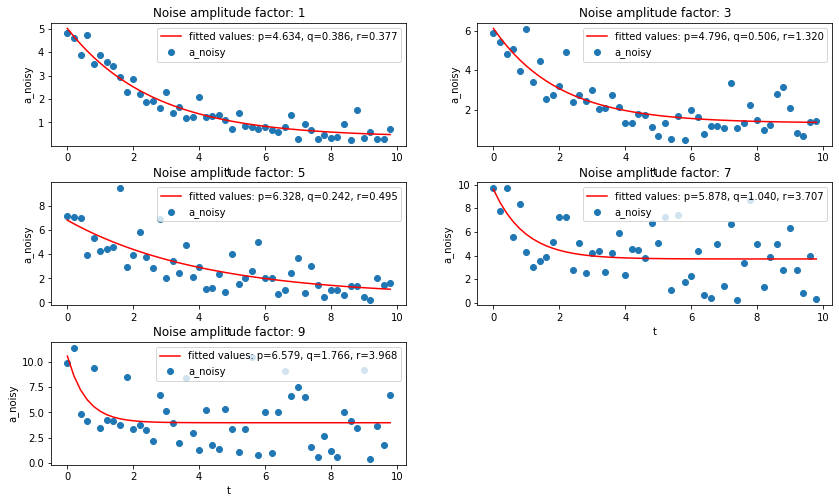

In [5]:
a= 4.5 * np.exp(-0.4*t) # original signal
# noise amplitude factors
min_amp=1
max_amp=11
noise_amplitude_factor = np.arange(min_amp,max_amp,2) # array containing different noise amplitude factors

# decide no. of rows and cols and index for subplot
cols=2
rows=max_amp//cols
i=0
fig = plt.figure(figsize=(14,14))
plt.subplots_adjust(hspace=0.3)

for amp in noise_amplitude_factor:
  # intensity can't be less than 0 for photobleaching process hence taking absolute
    a_noise=np.abs(amp*np.random.normal(0,0.5, size=t.shape)) 
    a_new=[]
  # updating a values by adding noise  
    a_new=a+a_noise

  # plotting the updated noisy a values with t values
    i+=1
    ax=plt.subplot(rows,cols,i)
    plt.scatter(t, a_new,label='a_noisy')
  # fit the noisy data to exp decay function
    try:
        popt, pcov = curve_fit(exp_func, t, a_new)
        plt.plot(t, exp_func(t, *popt), 'r-',label='fitted values: p=%5.3f, q=%5.3f, r=%5.3f' % tuple(popt)) 
        plt.title('Noise amplitude factor: '+str(amp))
        plt.xlabel('t')
        plt.ylabel('a_noisy')
        plt.legend()
    except RuntimeError:
        print("Unable to fit for amplitude factor = "+str(amp))
plt.show()


Observation: 
1. With higher values of amplitude factor fitting of exponential to data point is no longer closer to original signal.
2. For lower noise levels than 4.5 we most likely get good fit. 
However, for values greater than that 
 case a: it may fit the exponential with arbitrary p, q, r values which are very different from original signal.
 case b: python shows RuntimeError implying it can't fit to the exponential decay curve. Therefore, I added exception handling to highlight such cases without showing error. 





# TASK 2




# With extracted frames from asset_brightfield.mov

In [6]:
path = 'E:/Jonathan Taylor/assets_brightfield/'

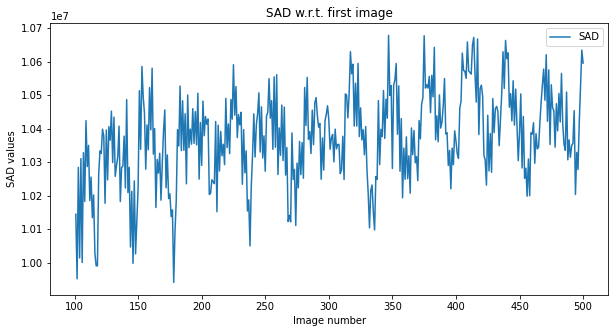

In [7]:
ref_img_array =cv2.imread(path+"/00001.tiff")
sad_array=[]
for c_tif in (os.listdir(path)):
    img_array =cv2.imread(path+"/"+c_tif)
    sad=np.sum(np.absolute(img_array-ref_img_array))
    sad_array.append(sad)

# print(sad_array)
image_num = np.arange(1, 1001, 1)
fig = plt.figure(figsize=(10, 5))
plt.plot(image_num[100:500],(sad_array[100:500]),label='SAD')
plt.title('SAD w.r.t. first image')
plt.xlabel('Image number')
plt.ylabel('SAD values')
plt.legend()
plt.show()
   
# cv2.imshow('window_name', img_array)
  
# cv2.waitKey(0)
  
# # closing all open windows
# cv2.destroyAllWindows()

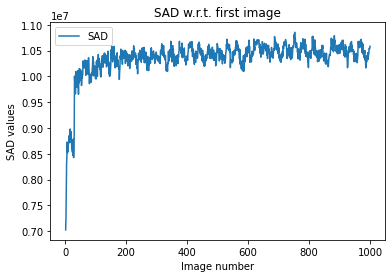

In [8]:
plt.plot(image_num[1:],sad_array[1:],label='SAD')
plt.title('SAD w.r.t. first image')
plt.xlabel('Image number')
plt.ylabel('SAD values')
plt.legend()
plt.show()

# From provided brightfield.tif file

In [9]:
path1 = 'E:/Jonathan Taylor/brightfield.tif/'
image = imread(path1)
image.shape

(1000, 170, 173)

In [10]:
print(len(image))

1000


Averaging the signal to reduce noise

1000


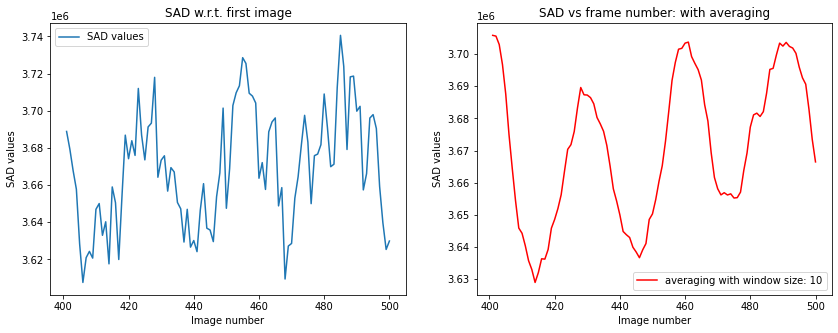

In [11]:
#--------------------------------------SAD calculation---------------------------------------
sad_array1=[]
for i in range (len(image)):
    sad=np.sum(np.absolute(image[0]-image[i]))    # image[0]  = reference image
    sad_array1.append(sad)
print(len(sad_array))
# print(sad_array)
image_num = np.arange(1, 1001, 1)

#----------------------------------- Plot sad values ---------------------------
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(image_num[400:500],(sad_array1[400:500]),label='SAD values')
plt.title('SAD w.r.t. first image')
plt.xlabel('Image number')
plt.ylabel('SAD values')
plt.legend()

import pandas as pd

#-------- Let's average the window size of SAD values to visualize trend of  data points vs frame number.--------------
size=10
ts = sad_array1[0:1000]
plt.subplot(1,2,2)
smooth_data = pd.Series(ts).rolling(window=size).mean()
#plt.plot(image_num[300:1000],sad_array1[300:1000],'b-', label='original')
plt.plot(image_num[400:500],smooth_data[400:500],'r-',label='averaging with window size: '+str(size))
# print(len(smooth_data))
plt.title('SAD vs frame number: with averaging')
plt.xlabel('Image number')
plt.ylabel('SAD values')
plt.legend()
plt.show()

Frequency spectrum

As per frames from video/tif files,
I am taking the data collection rate to be 31FPS.
Calculated as:
$\frac{\text{Total number of frames}}{\text{Video length}} =\frac{1000}{33s} = 30.3fps $


Text(0, 0.5, 'log(amplitude)')

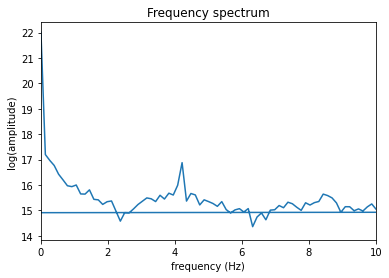

In [12]:
from __future__ import division
from numpy import fft

rate = 66 # greater than twice of FPS (to satify nyquist sampling condition)
Hx = abs(fft.rfft(sad_array1))
freqX = fft.fftfreq(len(Hx), 1/rate)
plt.xlim([0,10])

plt.plot(freqX,np.log(Hx),label='freq with rate 66 FPS') #log of amplitude

plt.xlabel('frequency (Hz)')#
plt.title('Frequency spectrum')#
plt.ylabel('log(amplitude)')

Observation: 

From  above plot it is evident that frequency around 2.3Hz is major contributor followed by higher harmonics. It implies
$2.3Hz\times 60 sec =138 bpm$ should be heart beating rate of given organism.  ---- similar to Zebrafish at embryonic stage.